### Building and Visualizing a Dataset from Twitter

In [164]:
from textblob import TextBlob
import tweepy
import nltk
import re
import pandas as pd

In [165]:
# Your Twitter app credentials need to be added here - go to https://developer.twitter.com/en/apps
consumer_key = ''
consumer_key_secret = ''
access_token = ''
access_token_secret = ''

In [166]:
twitter_auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)

In [167]:
api = tweepy.API(twitter_auth)

In [180]:
# Let's grab a bunch of tweets
tweets = api.search("cork", count=500)

In [181]:
# Storing features from the tweets that will be useful for ML later
df = pd.DataFrame(columns=('tweet_text', 'sentiment', 'subjectivity',
                           'followers_count', 'friends_count',
                           'account_age', 'verified',
                           'favourites_count', 'tweets'))

# Remove duplicates
df.sort_values("tweet_text", inplace = True) 
df.drop_duplicates(subset ="tweet_text", keep = False, inplace = True) 


# Note: Removing any URL's in the tweet text here also
for tweet in tweets:
    sentimentText = TextBlob(tweet.text)
    df = df.append({'tweet_text': re.sub(r'http\S+', '', tweet.text),
                    'sentiment': sentimentText.sentiment.polarity,
                    'subjectivity': sentimentText.sentiment.subjectivity,
                    'followers_count': tweet.user.followers_count, 
                    'friends_count': tweet.user.friends_count,
                    'account_age': tweet.user.created_at,  # TODO: Convert to number of days since account creation
                    'verified': tweet.user.verified,
                    'favourites_count': tweet.user.favourites_count,
                    'tweets': tweet.user.statuses_count},
                   ignore_index=True)
    
df.head()

,tweet_text,sentiment,subjectivity,followers_count,friends_count,account_age,verified,favourites_count,tweets
0,RT @drcsadlier: Today we disbanded the COVID w...,-0.250000,0.25,1341,1207,2014-07-29 11:52:44,False,7215,4991
1,RT @rtenews: A school in West Cork has won 'Sc...,0.400000,0.50,798,725,2018-01-29 01:16:09,False,13,91556
2,RT @eamofaller: It’s been a crazy couple of mo...,-0.066667,0.60,1341,1207,2014-07-29 11:52:44,False,7215,4991
3,I know a few space cadets from Cork myself. 😂,-0.200000,0.10,16077,3837,2009-02-13 12:20:20,False,3950,50865
4,@drcsadlier @OSullivanJennie @CUH_Cork @HSELiv...,0.000000,0.75,2,37,2020-05-15 12:44:38,False,1,12


In [182]:
# Average sentiment of the tweets?

print ("The average sentiment of the tweets is {} ".format(df["sentiment"].mean()))


The average sentiment of the tweets is 0.13446549422799425 


There are 10456 words in all tweets.
There are 8533 words in  all tweets with stopwords removed.


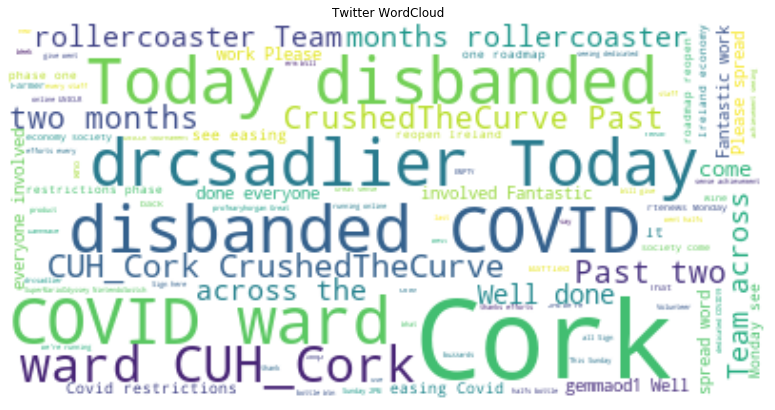

In [183]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 

# Setup stop words
stop_words = stopwords.words('english') 
new_stopwords = ['RT']
stop_words.extend(new_stopwords)
stop_words = set(stop_words)

# Remove stopwords
text = " ".join(review for review in df.tweet_text)
clean_text = " ".join(word for word in text.split() if word not in stop_words)

print ("There are {} words in all tweets.".format(len(text)))
print ("There are {} words in  all tweets with stopwords removed.".format(len(clean_text)))

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(clean_text)

plt.figure( figsize=(15,7))
plt.axis("off")
plt.title("Twitter WordCloud")
plt.imshow(wordcloud, interpolation='bilinear')